# KNN Algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
dataset=load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
df['target']=dataset.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [12]:
scaled_data=scaler.transform(df.drop('target',axis=1))

In [15]:
df_feat=pd.DataFrame(scaled_data,columns=df.columns[:-1])

In [16]:
df_feat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [17]:
df_feat['target']=df['target']

In [18]:
df_feat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data,df['target'],
                                                    test_size=0.30)


In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred=knn.predict(x_test)

In [29]:
y_pred

array([0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2,
       2])

# Evaluation of KNN model

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [32]:

print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 11  0]
 [ 0  2 18]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# Choosing a k_value(suitable) 

In [34]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

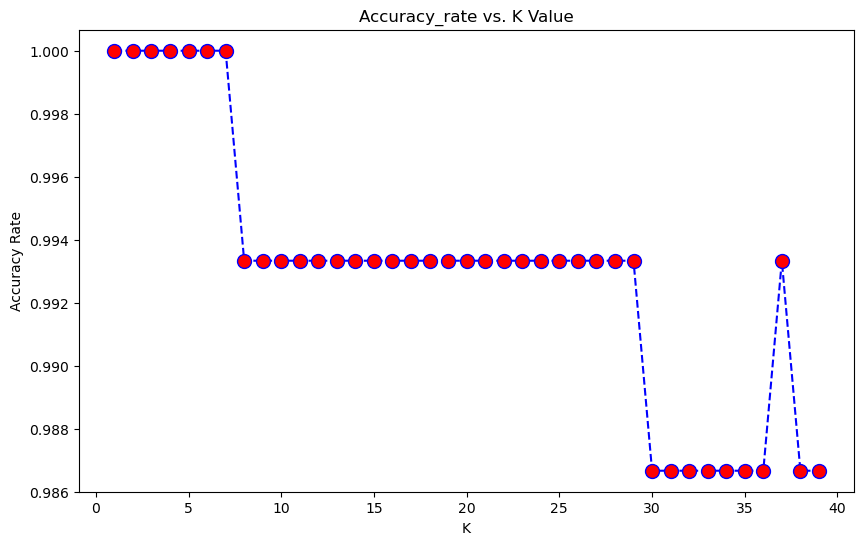

In [36]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [39]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))


WITH K=1


[[14  0  0]
 [ 0 11  0]
 [ 0  2 18]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [42]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=5


[[14  0  0]
 [ 0 11  0]
 [ 0  2 18]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45

